In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Signal:
    def __init__(self, data, domain, domain_type="generic"):
        self.data = data
        self.domain = domain
        self.domain_type = domain_type
        
    def __add__(self, other):
        if self.domain_type != other.domain_type:
            raise ValueError("Domain types must match for addition")

        dict_domain = {}
        for i in range(len(self.domain)):
            dict_domain[self.domain[i]] = self.data[i]

        for i in range(len(other.domain)):
            if other.domain[i] in dict_domain:
                dict_domain[other.domain[i]] += other.data[i]
            else:
                dict_domain[other.domain[i]] = other.data[i]

        domain = []
        data = []
        for key in sorted(dict_domain.keys()):
            domain.append(key)
            data.append(dict_domain[key])

        return Signal(data, domain, domain_type=self.domain_type)

    def __len__(self):
        return len(self.data)

    def __sub__(self, other):
        if self.domain_type != other.domain_type:
            raise ValueError("Domain types must match for subtraction")

        dict_domain = {}
        for i in range(len(self.domain)):
            dict_domain[self.domain[i]] = self.data[i]

        for i in range(len(other.domain)):
            if other.domain[i] in dict_domain:
                dict_domain[other.domain[i]] -= other.data[i]
            else:
                dict_domain[other.domain[i]] = -other.data[i]

        domain = []
        data = []
        for key in sorted(dict_domain.keys()):
            domain.append(key)
            data.append(dict_domain[key])

        return Signal(data, domain, domain_type=self.domain_type)

    def __repr__(self):
        return f"Signal(data={self.data}, domain={self.domain}, domain_type={self.domain_type})"
    
    def plot(self):
        plt.figure()
        if self.domain_type == "time":
            plt.stem(self.domain, self.data, basefmt=' ')
            plt.xlabel("Time")
            plt.ylabel("Amplitude")
            plt.title("Discrete-Time Signal")
        else:
            plt.stem(self.domain, np.abs(self.data), basefmt=' ')
            plt.xlabel("Frequency")
            plt.ylabel("Magnitude")
            plt.title("Frequency Spectrum")
        plt.grid(True)
        plt.show()
    


In [3]:
def gen_time_series(amplitude, freq, phase=0, signal=np.cos):
    if signal not in [np.cos, np.sin]:
        raise ValueError("Signal must be either np.cos or np.sin")

    phase_rad = np.deg2rad(phase)

    def time_series(t_start, t_end, fs):
        t = np.arange(t_start, t_end, 1 / fs)
        data = amplitude * signal(2 * np.pi * freq * t + phase_rad)
        return Signal(data, t, domain_type="time")

    return time_series


def dft(signal, fs, shift=False):
    if signal.domain_type != "time":
        raise ValueError("DFT can only be applied to time domain signals")
    
    N = len(signal)
    
    if shift:
        freq = np.array([k * fs / N for k in range(-N//2, N//2)])
    else:
        freq = np.array([k * fs / N for k in range(N)])

    X = np.zeros(N, dtype=complex)
    n = np.arange(N)
    
    for k in range(N):
        X[k] = np.sum(signal.data * np.exp(-2j * np.pi * k * n / N))


    if shift:
        if N % 2 == 0:
            X = np.concatenate((X[N//2:], X[:N//2]))
        else:
            X = np.concatenate((X[(N+1)//2:], X[:(N+1)//2]))
    
    return Signal(X, freq, domain_type="frequency")

def idft(signal, fs, shift=False):
    if signal.domain_type != "frequency":
        raise ValueError("IDFT can only be applied to frequency domain signals")
    
    N = len(signal)
    
    t = np.array([n/fs for n in range(N)])
    

    X = signal.data
    if shift:
        if N % 2 == 0:
            X_shifted = np.concatenate((signal.data[N//2:], signal.data[:N//2]))
        else:
            X_shifted = np.concatenate((signal.data[(N+1)//2:], signal.data[:(N+1)//2]))
        X = X_shifted
    x = np.zeros(N, dtype=complex)
    n = np.arange(N)
    
    for k in range(N):  
        x[k] = np.sum(X * np.exp(2j * np.pi * k * n / N)) / N
    
    x = np.real(x)
    
    return Signal(x, t, domain_type="time") 

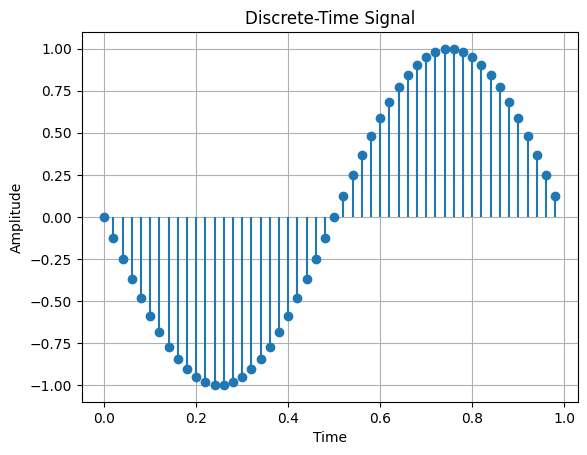

In [4]:
# Example usage
f1 = 1  # 1 Hz
phase = 90  # 0 degrees
generator = gen_time_series(amplitude=1, freq=f1, phase=phase, signal=np.cos)

# Generate 1 second of signal at 100 Hz sampling rate
signal = generator(t_start=0, t_end=1, fs=50)
signal.plot()

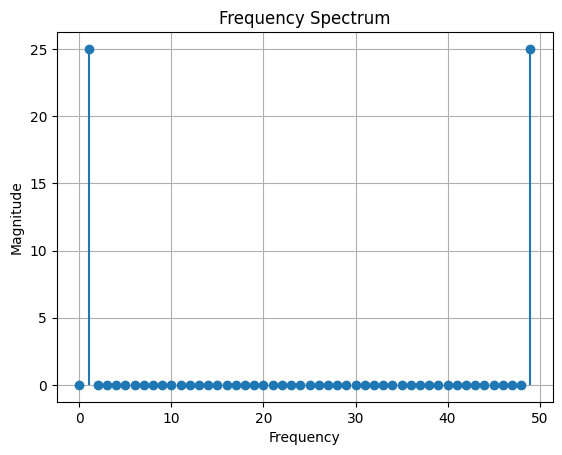

In [5]:
dft_signal = dft(signal, 50)

dft_signal.plot()

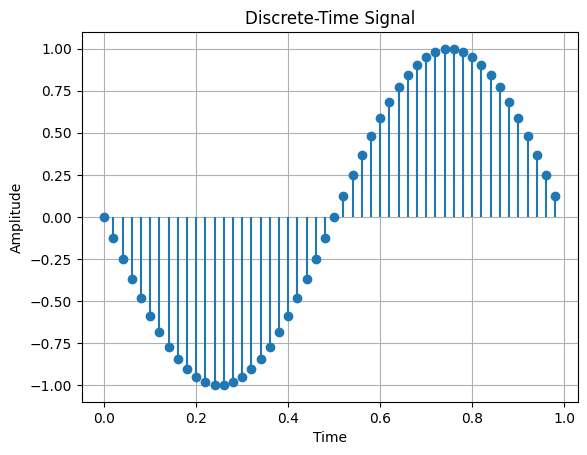

In [6]:
idft_signal = idft(dft_signal, 50)
idft_signal.plot()

In [7]:
Fs = 100
f1 = 2
f2 = 4

X1_generator = gen_time_series(amplitude=1, freq=f1, phase=0, signal=np.cos)
X2_generator = gen_time_series(amplitude=3, freq=f2, phase=0, signal=np.cos)

end_time = 1 / min(f1, f2)

X1 = X1_generator(0, end_time, Fs)
X2 = X2_generator(0, end_time, Fs)

X3= X1 + X2

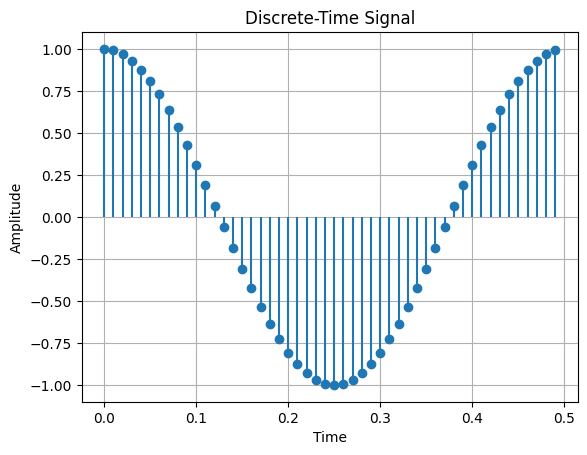

In [8]:
X1.plot()

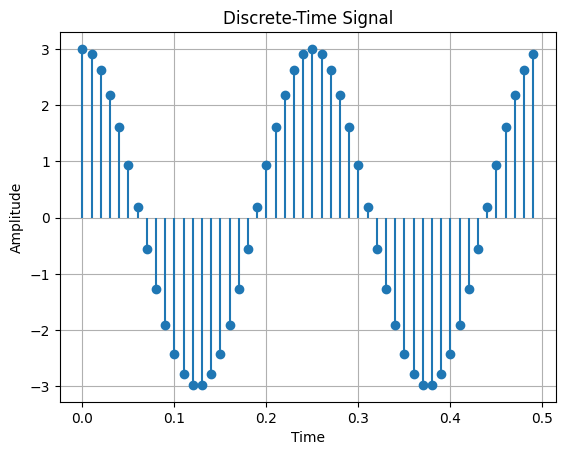

In [9]:
X2.plot()

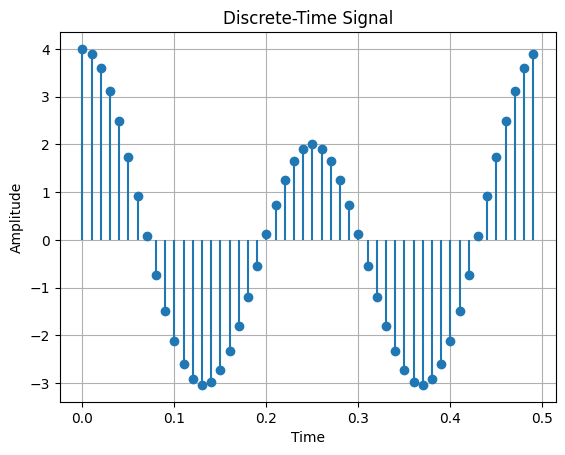

In [10]:
X3.plot()

In [11]:
X1_dft = dft(X1, Fs)
X2_dft = dft(X2, Fs)
X3_dft = dft(X3, Fs)

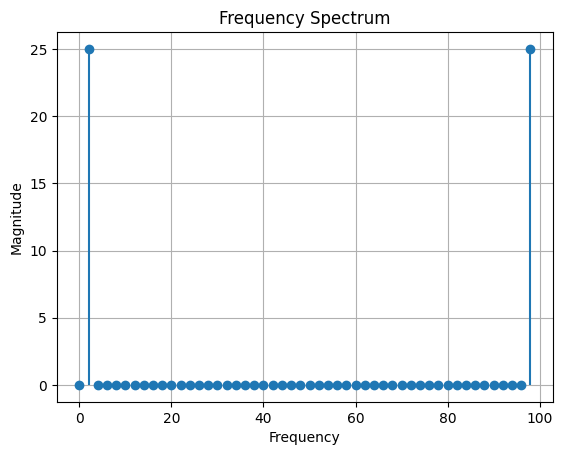

In [12]:
X1_dft.plot()

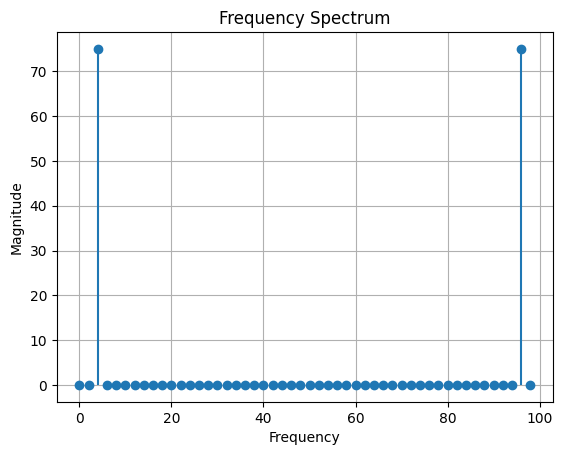

In [13]:
X2_dft.plot()

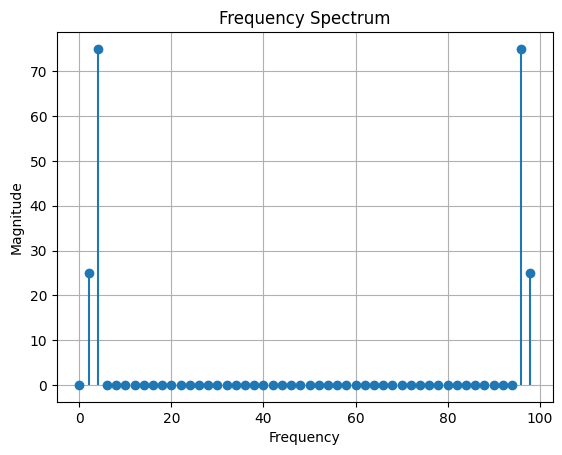

In [14]:
X3_dft.plot()

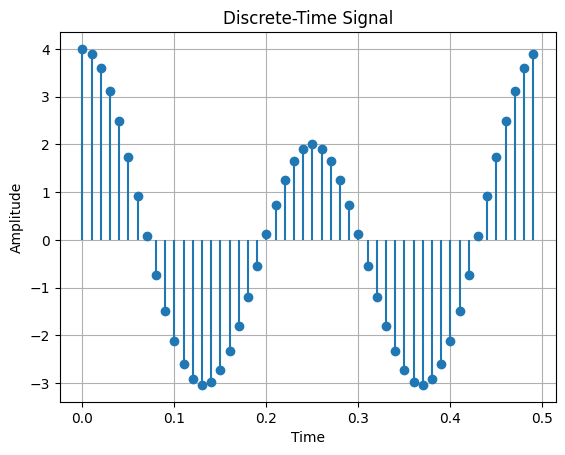

In [15]:
idft_signal = idft(X3_dft, Fs)
idft_signal.plot()